In [69]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

train = pd.read_csv('movies_train.csv')
test = pd.read_csv('movies_test.csv')

# 데이터 전처리

In [70]:
# 결측치가 많은 데이터 제거
train = train.drop(['dir_prev_bfnum'],axis = 1)
test =  test.drop(['dir_prev_bfnum'],axis = 1)

In [71]:
# 감독명 : 너무 다양해서 제거
train = train.drop(['director'],axis = 1)
test = test.drop(['director'],axis = 1)

In [72]:
# 제목 : 의미가 없기 때문에 제거
train = train.drop(['title'],axis= 1)
test = test.drop(['title'],axis= 1)

In [73]:
# 상위 5개의 배급사를 제외하고 '기타'로처리
distributor_list = train.distributor.value_counts()[:5]
def func(distributor):
    if distributor in distributor_list:
        return distributor
    else:
        return '기타'

train['distributor'] = train['distributor'].apply(lambda x : func(x))
test['distributor'] = test['distributor'].apply(lambda x : func(x))

In [74]:
# 개봉일을 바탕으로 년,월 변수 생성
train['년'] = train['release_time'].apply(lambda x: int(x[:4]))
train['월'] = train['release_time'].apply(lambda x: int(x[5:7]))
train =  train.drop(['release_time'],axis = 1)

test['년'] = test['release_time'].apply(lambda x: int(x[:4]))
test['월'] = test['release_time'].apply(lambda x: int(x[5:7]))
test =  test.drop(['release_time'],axis = 1)

In [75]:
# 원핫 인코딩
train = pd.get_dummies(train)
test = pd.get_dummies(test)

# 모델 생성 및 예측(과제부분)

In [76]:
#Daycon 베이스라인 코드 참고

train_features = train.drop(['box_off_num'],axis = 1)
train_target = train['box_off_num']

1. SVM

In [78]:
from sklearn import svm

SVMClassifier = svm.SVC(C=0.5)

SVMClassifier.fit(train_features, train_target)
prediction_svm = SVMClassifier.predict(test)

2. Decision Tree

In [79]:
from sklearn.tree import DecisionTreeRegressor

DTRegressor = DecisionTreeRegressor()
DTRegressor.fit(train_features,train_target)
prediction_dt = DTRegressor.predict(test)

3. Ensemble

- Bagging

In [81]:
from sklearn.ensemble import RandomForestClassifier

RFClassifier = RandomForestClassifier(n_estimators=50)
RFClassifier.fit(train_features,train_target)
prediction_rf = RFClassifier.predict(test)

- Boosting

In [82]:
from sklearn.ensemble import GradientBoostingRegressor

GBRegressor = GradientBoostingRegressor(n_estimators=50)
GBRegressor.fit(train_features,train_target)
prediction_gbr = GBRegressor.predict(test)

- XGBoost

In [83]:
import xgboost as xgb

XGBRegressor = xgb.XGBRegressor()
XGBRegressor.fit(train_features,train_target)
prediction_xgb = XGBRegressor.predict(test)

# 제출

In [84]:
submission_svm = pd.read_csv('submission.csv')
submission_dt = pd.read_csv('submission.csv')
submission_rf = pd.read_csv('submission.csv')
submission_gbr = pd.read_csv('submission.csv')
submission_xgb = pd.read_csv('submission.csv')

In [85]:
submission_svm['box_off_num'] = prediction_svm
submission_dt['box_off_num'] = prediction_dt
submission_rf['box_off_num'] = prediction_rf
submission_gbr['box_off_num'] = prediction_gbr
submission_xgb['box_off_num'] = prediction_xgb

In [86]:
submission_rf

,title,box_off_num
0,용서는 없다,1646142
1,아빠가 여자를 좋아해,3009406
2,하모니,27083
3,의형제,1110523
4,평행 이론,13108
...,...,...
238,해에게서 소년에게,1611
239,울보 권투부,4586
240,어떤살인,1504
241,말하지 못한 비밀,9566


In [88]:
submission_svm.to_csv('베이스라인_svm.csv',index = False)
submission_dt.to_csv('베이스라인_dt.csv',index = False)
submission_rf.to_csv('베이스라인_rf.csv',index = False)
submission_gbr.to_csv('베이스라인_gbr.csv',index = False)
submission_xgb.to_csv('베이스라인_xgb.csv',index = False)

# 제출 점수(과제부분)

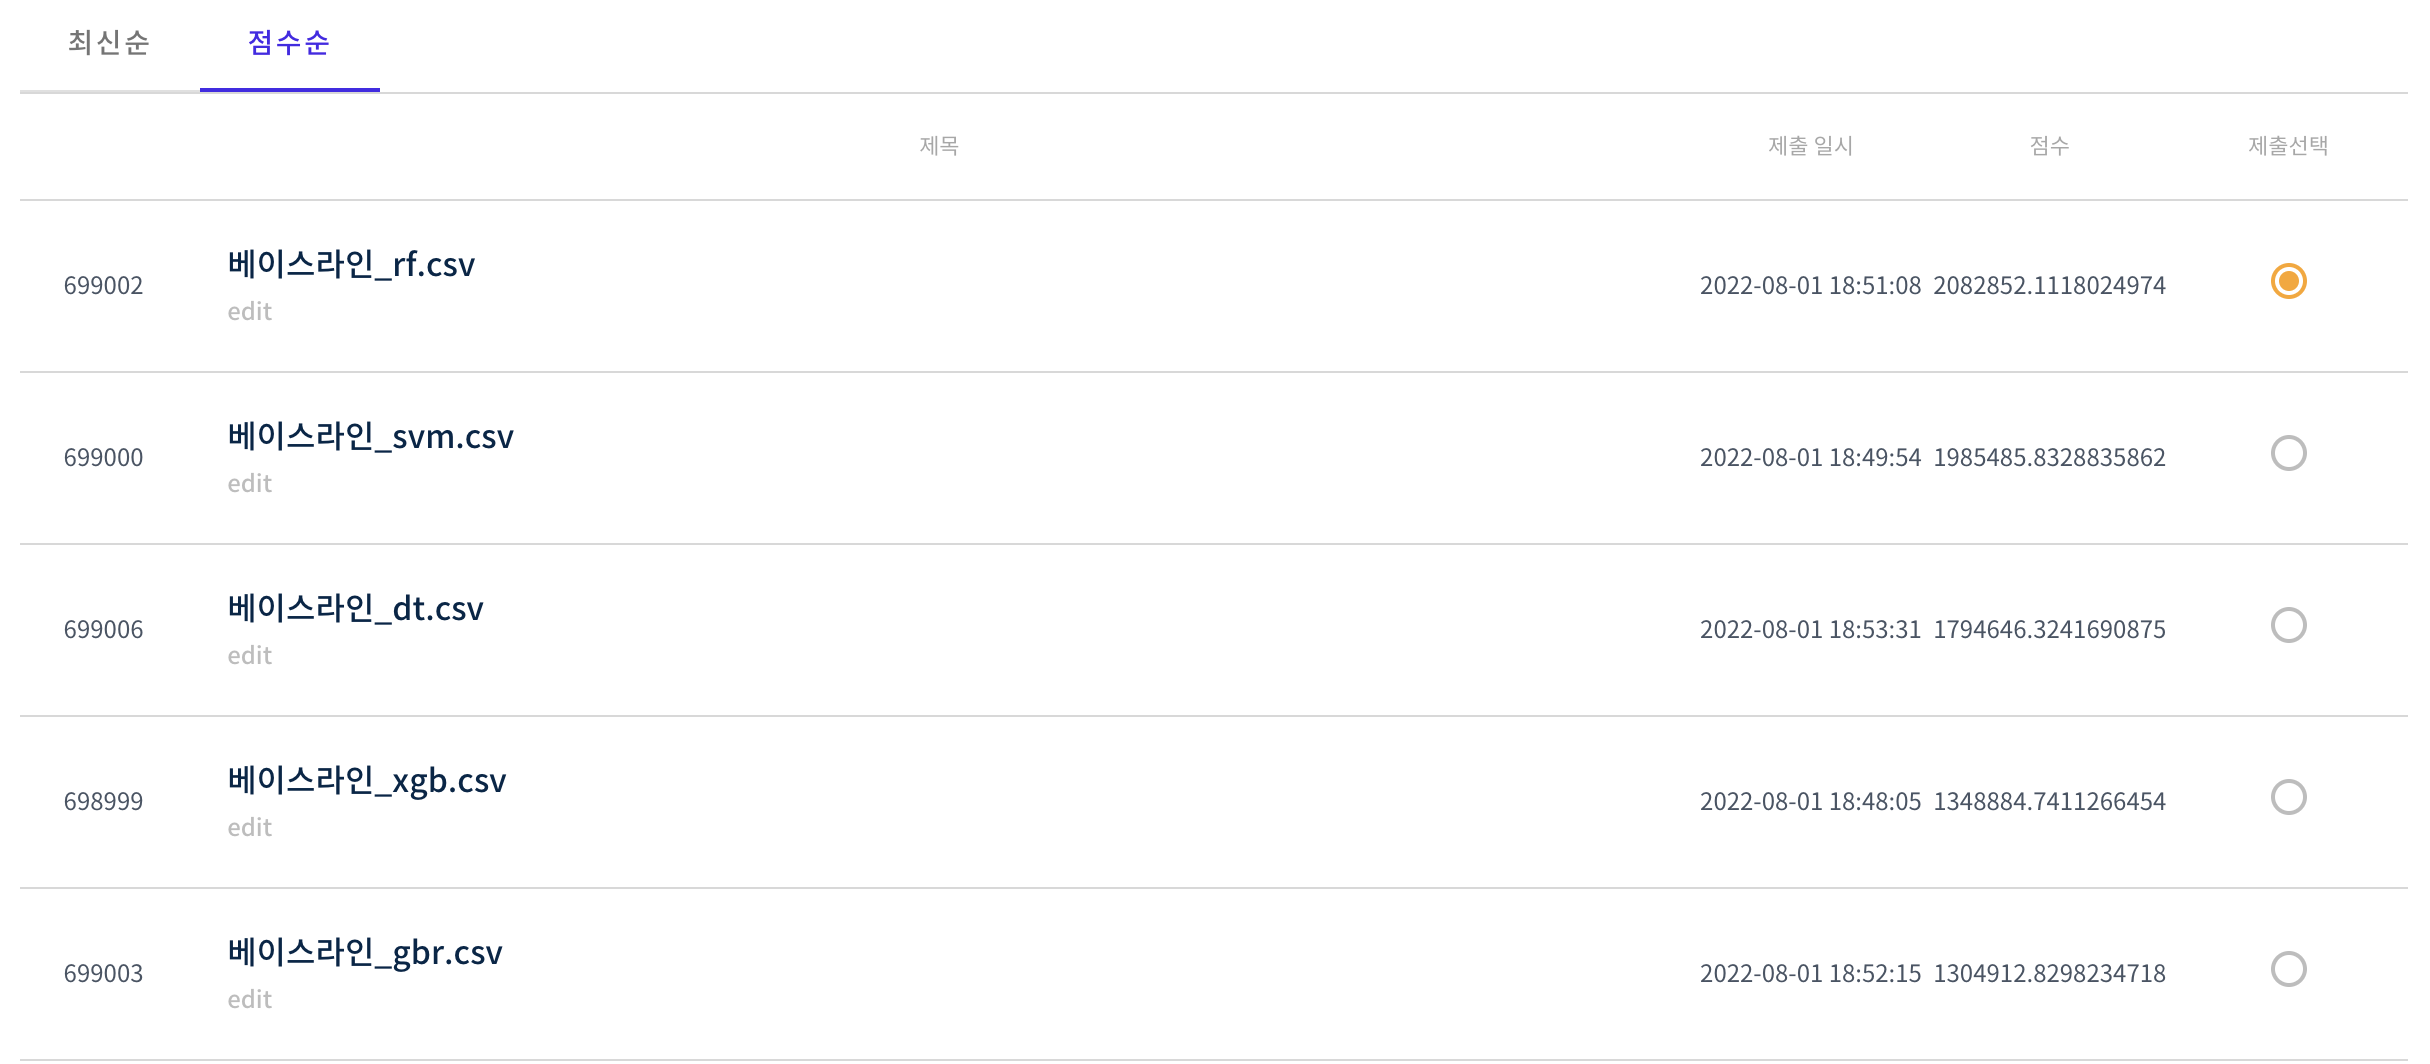

In [89]:
from IPython.display import Image 
Image("./score.png")